# Correction of practice 7

In [9]:
import csv
import pandas as pd

In [6]:
all_sym = []
with open(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\list_symbols_euronext.csv", 'r') as file:
    csvfile = csv.reader(file)
    for row in csvfile:
#         for i in row:
#             all_sym.append(i)
        all_sym = all_sym + row
#         print(row)
        break
print(len(all_sym))

1764


In [7]:
with open(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\list_symbols_US.csv", 'r') as file:
    csvfile = csv.reader(file)
    for row in csvfile:
#         for i in row:
#             all_sym.append(i)
        all_sym = all_sym + row
#         print(row)
        break
print(len(all_sym))

10045


In [15]:
list_df = []
for i in all_sym[:10]:
    print(i)
    try:
        df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+ i +"?period1=0&period2=1661904000&interval=1d&events=history&includeAdjustedClose=true")
        df['SYM'] = i
        list_df.append(df)
    except:
        print('error')


ALMIL.PA
2020.OL
2CRSI.PA
5PG.OL
MLATV.PA
error
ALAST.PA
AALB.AS
AASB.OL
ABI.BR
AB.PA
            Date       Open       High        Low      Close  Adj Close  \
0     2006-02-08  23.299999  23.299999  23.299999  23.299999  20.706812   
1     2006-02-09  17.950001  17.950001  17.950001  17.950001  15.952246   
2     2006-02-10  16.990000  16.990000  16.990000  16.990000  15.099088   
3     2006-02-13  18.059999  18.059999  18.059999  18.059999  16.050003   
4     2006-02-14  19.000000  19.000000  19.000000  19.000000  16.885386   
...          ...        ...        ...        ...        ...        ...   
3158  2022-08-24   7.500000   7.500000   7.280000   7.380000   7.380000   
3159  2022-08-25   8.280000   9.400000   8.260000   8.800000   8.800000   
3160  2022-08-26   8.640000   9.070000   8.570000   8.910000   8.910000   
3161  2022-08-29   8.720000   9.045000   8.600000   8.870000   8.870000   
3162  2022-08-30   8.950000   9.095000   8.860000   9.025000   9.025000   

        Volum

In [16]:
df_final = pd.concat(list_df, ignore_index = True)
print(df_final)

             Date       Open       High        Low      Close  Adj Close  \
0      2006-02-08  23.299999  23.299999  23.299999  23.299999  20.706812   
1      2006-02-09  17.950001  17.950001  17.950001  17.950001  15.952246   
2      2006-02-10  16.990000  16.990000  16.990000  16.990000  15.099088   
3      2006-02-13  18.059999  18.059999  18.059999  18.059999  16.050003   
4      2006-02-14  19.000000  19.000000  19.000000  19.000000  16.885386   
...           ...        ...        ...        ...        ...        ...   
30232  2022-08-24   7.500000   7.500000   7.280000   7.380000   7.380000   
30233  2022-08-25   8.280000   9.400000   8.260000   8.800000   8.800000   
30234  2022-08-26   8.640000   9.070000   8.570000   8.910000   8.910000   
30235  2022-08-29   8.720000   9.045000   8.600000   8.870000   8.870000   
30236  2022-08-30   8.950000   9.095000   8.860000   9.025000   9.025000   

         Volume       SYM  
0           0.0  ALMIL.PA  
1      177800.0  ALMIL.PA  
2  

In [17]:
df_final.to_csv(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\the_csv_version.csv")

In [18]:
df_final.to_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\the_parquet_version.parquet")

# Lecture 8: Graphs

In [19]:
#import
import pandas as pd


In [20]:
#load our data
#pip install : pyarrow and fastparquet
df_origin = pd.read_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_8\df_final_US_EUR.parquet")

In [21]:
#print our data
print(df_origin)

               Date  Open   High   Low  Close  Adj Close   Volume      Name
0        2008-01-29  9.50   9.99  8.57   8.75   0.702589  1489000      AACG
1        2008-01-30  8.75   9.15  8.30   8.50   0.682516   219000      AACG
2        2008-01-31  8.49  10.30  8.49   9.55   0.766826   182300      AACG
3        2008-02-01  9.93   9.94  9.50   9.51   0.763614    28200      AACG
4        2008-02-04  9.50   9.71  9.50   9.50   0.762811     8300      AACG
...             ...   ...    ...   ...    ...        ...      ...       ...
27247611 2022-08-24  9.54   9.54  7.75   9.00   9.000000   125933  ZWIPE.OL
27247612 2022-08-25  8.79   9.99  8.03   9.34   9.340000   159549  ZWIPE.OL
27247613 2022-08-26  8.95   9.29  8.00   8.30   8.300000    17487  ZWIPE.OL
27247614 2022-08-29  8.12   8.61  7.86   7.98   7.980000    58661  ZWIPE.OL
27247615 2022-08-30  7.70   8.52  7.60   8.33   8.330000     7684  ZWIPE.OL

[27247616 rows x 8 columns]


In [44]:
#Select only a part of the data and reset_index (drop = True)
df = df_origin[df_origin['Name'] == 'GOOGL'].copy()
df.reset_index(drop = True, inplace = True)
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
1    2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2    2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
3    2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
4    2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...         ...         ...         ...         ...         ...         ...   
4535 2022-08-24  113.500000  114.779999  112.870003  113.690002  113.690002   
4536 2022-08-25  114.239998  116.720001  114.110001  116.650002  116.650002   
4537 2022-08-26  114.720001  115.120003  110.190002  110.339996  110.339996   
4538 2022-08-29  109.989998  110.949997  108.800003  109.419998  109.419998   
4539 2022-08-30  110.169998  110.500000  107.800003  108.940002  108.940002   

         Volume   Name  
0     893181924  GOOGL  
1

In [45]:
#install packages:
#pip install matplotlib
#pip install seaborn

<AxesSubplot:>

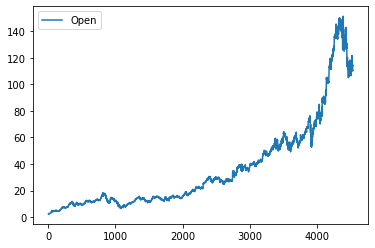

In [27]:
#Make you first plot without x axis (default is index)
#import matplotlib.pyplot as plt
#plt.show()
df.plot(y = 'Open')

<AxesSubplot:xlabel='Date'>

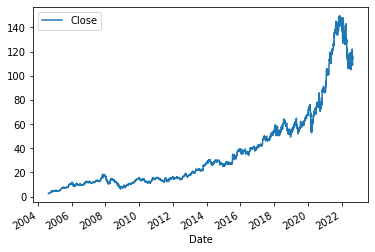

In [28]:
#you can also use another column as x axis
df.plot(x = 'Date', y = 'Close')

In [29]:
#You can select a smaller amount of data
import datetime
df_small = df[df['Date'] > datetime.datetime(2022,8,1)]

<AxesSubplot:xlabel='Date'>

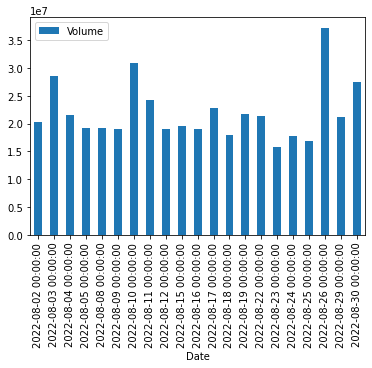

In [30]:
#use the bar kind
#use the kind attribute
df_small.plot(kind = 'bar', x = 'Date', y = 'Volume')

<AxesSubplot:ylabel='Date'>

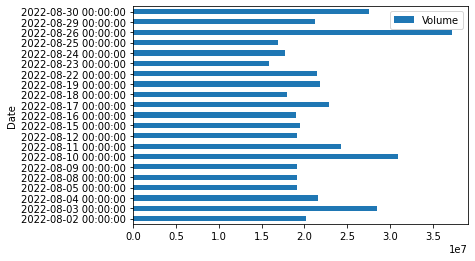

In [31]:
#use the horizontal bar kind
df_small.plot(kind = 'barh', x = 'Date', y = 'Volume')

<AxesSubplot:ylabel='Frequency'>

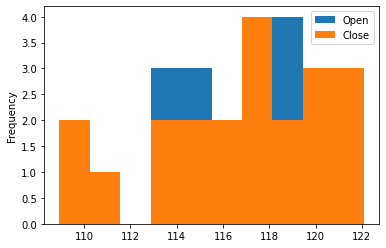

In [33]:
# use the histogram
df_small.plot(kind = 'hist', y = ['Open', 'Close'])

<AxesSubplot:>

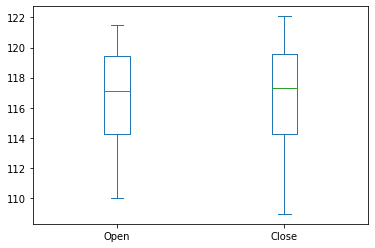

In [34]:
# use the boxplot (kind  = 'box')
df_small.plot(kind = 'box', y = ['Open', 'Close'])

<AxesSubplot:>

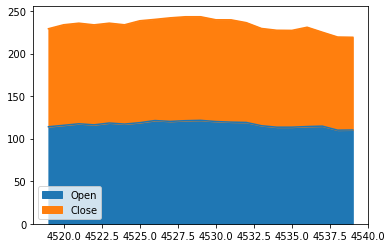

In [35]:
# use the area
df_small.plot(kind = 'area', y = ['Open', 'Close'])

<AxesSubplot:xlabel='Close', ylabel='Open'>

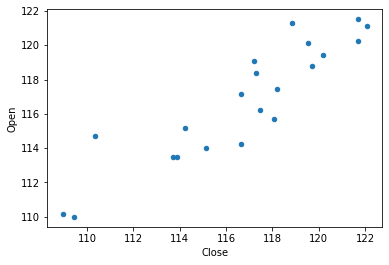

In [38]:
#the scatter version
df_small.plot(kind = 'scatter', x = 'Close', y = 'Open')

In [ ]:
#YOUR TURN (15 minutes)(with my parquet file install pyarrow and fastparquet package first)
#) or any csv data (price))
#%matplotlib inline
#Draw the evolution of the volume with the date in line
#Draw the scatter plot of the volume in function of the Open price
#import matplotlib.pyplot as plt
#plt.show()

<AxesSubplot:xlabel='Open', ylabel='Volume'>

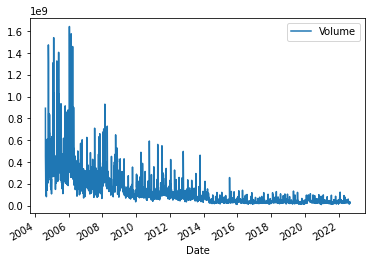

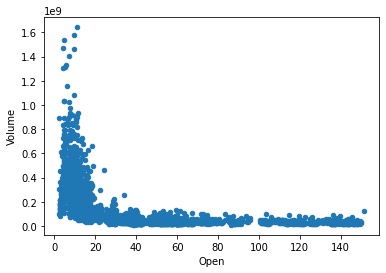

In [41]:
df.plot(x = 'Date', y = 'Volume')
df.plot(kind = 'scatter', x = 'Open', y = 'Volume')

In [48]:
# Add column:
#percentage change for 'Open'
#('open'[dayi] - 'open'[dayi-1]) / 'open'[dayi] *100
col = ['Open', 'High', 'Low', 'Close', 'Volume']
for c in col:
    perc = []
    for index, line in df.iterrows():
        if index == 0:
            perc.append(0)
        else:
            perc.append( (line[c] - df.loc[index-1, c])/line[c] *100)

    df['perc_'+c] = perc
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
1    2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2    2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
3    2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
4    2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...         ...         ...         ...         ...         ...         ...   
4535 2022-08-24  113.500000  114.779999  112.870003  113.690002  113.690002   
4536 2022-08-25  114.239998  116.720001  114.110001  116.650002  116.650002   
4537 2022-08-26  114.720001  115.120003  110.190002  110.339996  110.339996   
4538 2022-08-29  109.989998  110.949997  108.800003  109.419998  109.419998   
4539 2022-08-30  110.169998  110.500000  107.800003  108.940002  108.940002   

         Volume   Name  perc_Open  perc_High  perc_

In [ ]:
#YOUR TURN (10 minutes)
#Add the percentage change for all prices column and the volume


<AxesSubplot:xlabel='Close', ylabel='Open'>

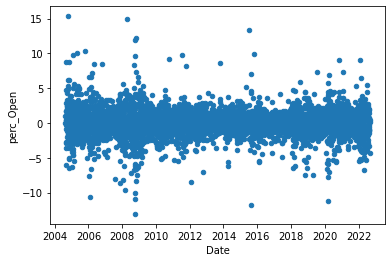

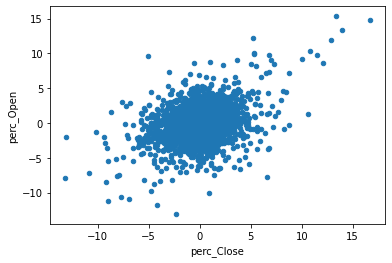

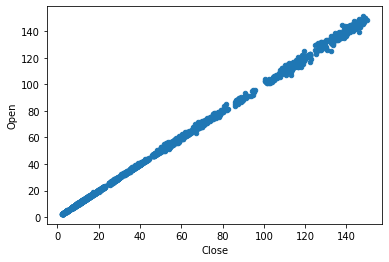

In [54]:
#print the link between datas (ex: perc or volume)
df.plot(kind = 'scatter', x = 'Date', y = 'perc_Open')
df.plot(kind = 'scatter', x = 'perc_Close', y = 'perc_Open')
df.plot(kind = 'scatter', x = 'Close', y = 'Open')

In [63]:
#Use matplotlib also
#https://matplotlib.org one of the most famous package to plot
# the command : "%matplotlib inline" may be necessary
import matplotlib.pyplot as plt

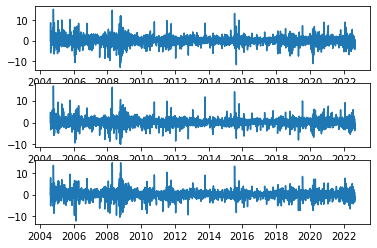

In [64]:
#create a figure with subplots and scatter
fig, ax = plt.subplots(3)
ax[0].plot(df['Date'], df['perc_Open'])
ax[1].plot(df['Date'], df['perc_High'])
ax[2].plot(df['Date'], df['perc_Low'])
plt.show()

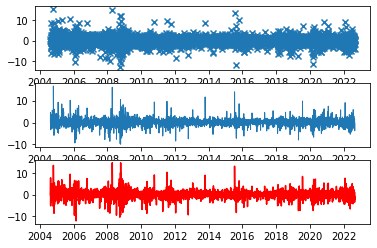

In [72]:
#Create a figure with plot
fig, ax = plt.subplots(3)
ax[0].scatter(df['Date'], df['perc_Open'], marker = 'x')
ax[1].plot(df['Date'], df['perc_High'], linewidth = 1)
ax[2].plot(df['Date'], df['perc_Low'], color = 'red')
plt.show()

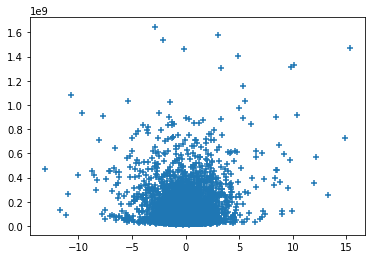

In [76]:
#Is the volume and the perc of change are linked? And the perc and the voume of the day before?
fig, ax = plt.subplots()
ax.scatter(df['perc_Open'], df['Volume'], marker = '+')
plt.show()

In [77]:
#Seaborn to draw plots
#https://seaborn.pydata.org/
import seaborn as sns


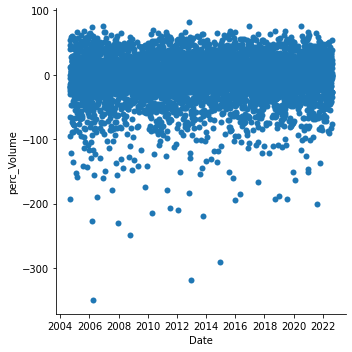

In [79]:
#draw your first plot, use data = df and the relplot() function, use linewidth to change the white order
sns.relplot(data = df, x = 'Date', y = 'perc_Volume', linewidth = 0)

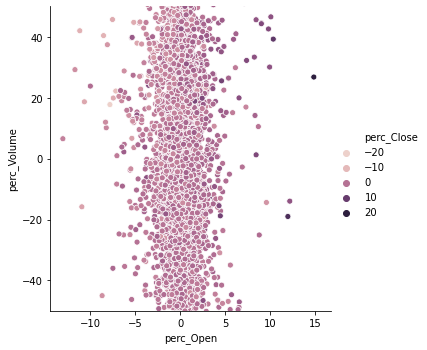

In [84]:
#Change min et max (ylim)
sns.relplot(data = df, x = 'perc_Open', y = 'perc_Volume', hue = 'perc_Close')
plt.ylim(-50,50)
plt.show()

In [ ]:
#another style with the set_style function
#list of style: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
